In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from Premier_League.src.cargaDatos.cargador_datos import CargadorDatos
from Premier_League.src.eda.procesador_eda import ProcesadorEDA


In [2]:
cargador = CargadorDatos(ruta_base="../src/data/raw")

df = cargador.cargar_csv("premier.csv")

Iniciando carga de: premier.csv
PROYECTO PROGRAMACION 2: INFORMACION ARCHIVO CARGADO
Archivo: premier.csv
Número de filas: 4,270
Número de columnas: 33
Porcentaje global de nulos: 0.04%
------------------------------------------------------------
Primeras 5 filas: 
               Player               Team   # Nation Position     Age  Minutes  \
0     Bruno Fernandes  Manchester United   8    POR    FW,AM  29-343     90.0   
1     Marcus Rashford  Manchester United  10    ENG       LW  26-290     90.0   
2         Amad Diallo  Manchester United  16    CIV       RW  22-036      NaN   
3  Alejandro Garnacho  Manchester United  17    ARG       RW  20-046     30.0   
4         Mason Mount  Manchester United   7    ENG       AM  25-219     60.0   

   Goals  Assists  Penalty Shoot on Goal  ...  Goal-Creating Actions  \
0      0        0                      0  ...                      0   
1      0        0                      0  ...                      0   
2      0        0              

In [3]:
eda = ProcesadorEDA()

# hacemos la limpieza
df_clean = eda.limpieza_datos(df, ruta_salida="../src/data/processed/premier_clean.csv")


columnList = ["Goals","Total Shoot","Assists", "Touches"]
#columnList = ["Red Cards","Yellow Cards","Tackles", "Blocks"]
#columnList = ["Carries","Progressive Carries","Pass Completion %", "Goal-Creating Actions", "Goals", "Assists"]

# resumen descrip
eda.resumen_descriptivo(df_clean, columnList)
# matriz para la correlacion
matriz_corr = eda.matriz_correlacion(df_clean, columnList, metodo='pearson')

LIMPIEZA DE DATOS

Estado inicial:
  Filas: 4,270
  Columnas: 33
  Valores nulos: 52 (0.04%)

 Columnas con valores nulos:
  • Pass Completion %: 46 nulos (1.08%)
  • Minutes: 6 nulos (0.14%)

Eliminando filas con valores nulos...

Estado final:
  Filas: 4,218
  Filas eliminadas: 52 (1.22%)
 Registros con múltiples posiciones: 628

Archivo guardado:
TIPOS DE DATOS POR COLUMNA
                   Columna            Tipo
0                   Player          object
1                     Team          object
2                   Nation          object
3                 Position          object
4                      Age           int64
5                  Minutes         float64
6                    Goals           int64
7                  Assists           int64
8              Total Shoot           int64
9          Shoot on Target           int64
10            Yellow Cards           int64
11               Red Cards           int64
12                 Touches           int64
13                 

C:\Users\ale23\Desktop\CUC\REPOS-CUC\proyecto-progra2-AQL-2025\Premier_League\src\eda\procesador_eda.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Position'] = df_limpio['Position'].str.split(',').str[0].str.strip()
C:\Users\ale23\Desktop\CUC\REPOS-CUC\proyecto-progra2-AQL-2025\Premier_League\src\eda\procesador_eda.py:286: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Age'] = df_limpio['Age'].astype(str).str.split('-').str[0]
C:\Users\ale23\Desktop\CUC\REPOS-CUC\proyecto-progra

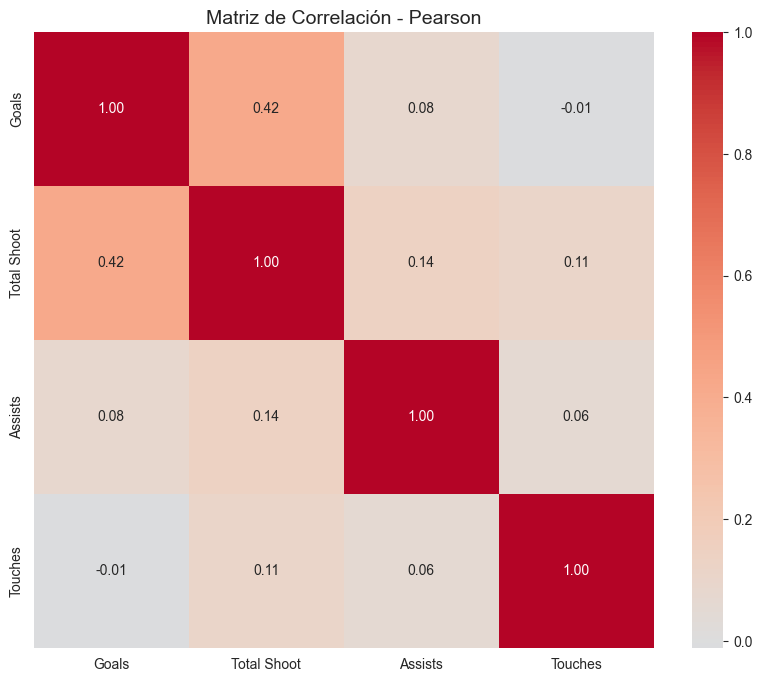

In [4]:
# grafico
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de Correlación - Pearson", fontsize=14)
plt.show()